**Turn in instructions** Do the assignment on Google Colab by making a copy of this document. You can insert code cells below each question to work your answer. Once you are finished, *adjusting the sharing permissions so "anyone with a link can view the document"*. Turn in the url of the Colab document to canvas so Natalie and I can review it.

Some students have been having trouble with colab version control and sharing permissions. So if you feel more comfortable uploading a static document instead of a link, download this file as an `.ipynb` file and upload that to Canvas. Either type of submission is fine for us.

Also, while marking the unit one assignment, it was sometimes a little hard to tell who your partner was if you had one. Please indicate that at the top of the assignment or in a canvas comment.

### Collaborators
- AJ Montajes (79291373)
- Janaye Cheong (91030312)

# Question 1 - How many components?

Throughout this unit, we've modeled the Asch data using a two-component mixture. This is based on the assumption that people come in two types - conformists and independents. But that assumption could be wrong. There might be three, four or more types of people with distinctive error rates. How many mixture components should we use in modeling the Asch data? Develop an argument for your position. Support your argument with evidence from Asch's paper. (4 points).

We decided to model our components based on the "OCEAN" or "Big Five" personality model. This model substantiates the following traits of *openness, conscientiousness, extraversion, agreeableness, and neuroticism*. Each of these traits relate to conformity in some shape or form; the participant's collaborative style and proclivity to assume the position of fellow confederates is largely dependent on self-esteem and social disposition constituted by the OCEAN personalities. For this exploration, we will be assuming that an individual whill exhibit a 'primary' and discrete trait that determines overall behaviour in teh experiment. Additionally, the traits will have error rates correspoding to their relationship to conformist behaviour.


> #### **Openness**
> - **Definition:** Openness characterizes an individual's willingness to experience a variety of activities, thoughtfulness, imagination, and curiosity.
>
> - **Relation to Conformity:**  Individuals with high openness might be less likely to conform due to their preference for exploring novel ideas and perspectives, and a lesser fear of standing out or being different. Relative to neurotic, agreeable and extroverted individuals, people who possess the primary trait of openness are less susceptible to errors due to their consideration of multiple perspectives and abstract concepts that do not necessarily conform with the majority.
> - **Error Rate:** 0.3


> #### **Conscientiousness**
> - **Definition:** Conscientiousness describes an individual's degree of organization, dependability, and diligence.
>
> - **Relation to Conformity:** Highly conscientious individuals might exhibit lower rates of conformity in situations that conflict with their internal standards or sense of responsibility, but might conform to adhere to rules or organized systems. Conscientious indviduals can fall in the group of *withdrawn* independents that exhibit non-conforomity rooted in personal values and individuality. Contrarily, conscientious individuals could also fall under the *distortion of action* conformists that conform due to the inability to incite disorder or experience inadequacy in regard to social duty. Thus, their error rate can be described as the closest to the median of the five OCEAN traits.
> - **Error Rate:** 0.5

> #### **Extraversion**
> - **Definition:** Extraversion is characterized by outgoingness, high energy levels, sociability, and the tendency to seek stimulation in the company of others.
>
> - **Relation to Conformity:** Extraverts might be more inclined to conform due to their high value on social relationships and being liked or accepted by others. They may conform to maintain positive social dynamics. Extraverts can either fall into the category of *confident* independents that are comfortable in social situations; alternatively, *distortion of action* resulting in conformity may also impact extraverts who feel that they cannot appear different or inferior from the majority.
> - **Error Rate:** 0.6

> #### **Agreeableness**
> - **Definition:** Agreeableness refers to an individual's propensity to be
compassionate, cooperative, and friendly toward others.
>
> - **Relation to Conformity:** Individuals with high agreeableness may be more inclined to conform in group settings to maintain harmony and positive relationships. Agreeable individuals have a higher error rate relative to those who possess conscientious as their primary traits due to their value of collective opinion. Thus, agreeable individuals are susceptible to conformity by *distortion of judgement and action.*
> - **Error Rate:** 0.7

> #### **Neuroticism**
> - **Definition:** Neuroticism is a trait characterized by emotional instability, anxiety, moodiness, and a higher propensity for negative emotions.
>
> - **Relation to Conformity:** Individuals with high levels of neuroticism might be more likely to conform due to fears of rejection or conflict, and a higher sensitivity to the opinions of others. Lower self-esteem and stress sensitivity contributes to further susceptibility and decision-making upon impulse, causing neurotic individuals to have the highest error rate out of the five OCEAN personality traits when in a relation of radical conflict with other members of a group. Neurotic individuals fall within the yielding group that distort perception, judgement and action due to lack of confidence.
> - **Error Rate:** 0.8
<br>

### Selecting Weights
- There wasn't much research to develop intuition on how we might start assigning weight values. However, we were able to find the graph below from a paper exploring Psychological Profiling of digital footprints.

- From the general shapes of the peaks of the graph, we derived our corresponding weights while also accounting for the demographic of the Asch experiment which would intuitively have higher rates of extraversion and agreeableness.

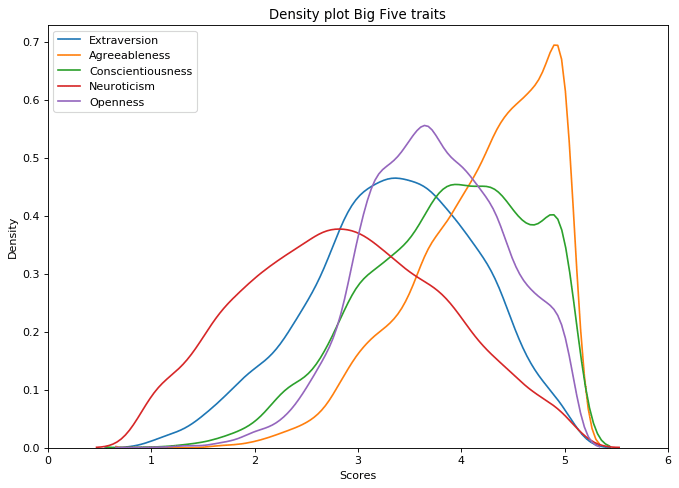

### Credit: https://www.researchgate.net/figure/Distribution-of-scores-on-the-Big-Five-traits-in-our-sample-of-6-408-individuals_fig3_356250738

# Question 2 - A simulation model

Develop a simulation model that represents the sort of mixture model you argued for in #1. You should have parameters that control the weights assigned to each mixture component. You should also have parameters which control the error rates in each group. It should be capable of generating simulated datasets. (2 points)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import pymc as pm
import arviz as az

from numpy.random import RandomState, MT19937, SeedSequence
markov_seed = RandomState(MT19937(SeedSequence(123456789)))

In [ ]:
!pip install numpyro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
# The OCEAN model for Asch Experiment

# provided error rates for each OCEAN trait
o_p, c_p, e_p, a_p, n_p = 0.3, 0.5, 0.6, 0.7, 0.8

# provided weights (for model) (probability that participant comes from each of the OCEAN traits)
# later used for determining beta params
o_rate, c_rate, e_rate, a_rate, n_rate = 0.25, 0.15, 0.20, 0.35, 0.05

# Dictionary data structure to encapsulate the traits and their corresponding weight/error rates
traits = {
  "openn": (o_p, o_rate),
  "consc": (c_p, c_rate),
  "extra": (e_p, e_rate),
  "agree": (a_p, a_rate),
  "neuro": (n_p, n_rate),
}

p = 100
n = 12

# Define your simulation function.

# Simulates the distribution of a mixed model of 5 weighted components

def simulate_experiment(traits, n=n, precision=p):


    '''
    traits: dict with error rates and weights for each of the OCEAN traits
    n - the number of critical trials in the experiment
    precision - the number of simulated people
    '''

    data = []

    # accumulator for the participants of each OCEAN category in the trial
    people_per_trait = {trait: 0 for trait in traits}

    for i in range(precision):
        # randomly select trait_name considering the weight of mixture component
        trait_name = np.random.choice(list(traits.keys()), p=[traits[trait][1] for trait in traits])

        # accumulate number of candidates matching trait
        people_per_trait[trait_name] += 1

        # establish error_rate corresponding to the specific primary trait
        error_rate = traits[trait_name][0]

        # perform asch trial (1 signifies correct outcome, 0 signifies error outcome)
        errors = stats.binom(p=error_rate, n=n).rvs()

        data.append(errors)


    return np.array(data), people_per_trait # returns array and OCEAN distribution per simulation


data, people_per_trait = simulate_experiment(traits)
data, people_per_trait

(array([ 5, 11,  4,  4,  4,  8, 11,  5, 12, 11,  1,  8,  7,  5,  8,  8,  8,
         3,  5,  5,  1,  5, 10,  8,  8,  9,  3,  7,  1,  6,  3,  4,  9,  8,
         6, 10,  7,  6,  7,  5, 10,  4,  8,  4,  6, 10,  4,  3,  8,  8,  6,
         2,  5,  8,  6,  8,  5,  7,  7,  4,  9,  9,  5,  9, 11,  6,  9,  3,
         6,  5,  2,  8,  5,  7,  3,  3,  8,  6, 11,  2,  9,  3,  9, 10, 11,
         8,  7, 10, 10,  8,  6,  9,  8,  7,  4,  5, 12,  5,  7, 10]),
 {'openn': 28, 'consc': 16, 'extra': 20, 'agree': 30, 'neuro': 6})

# Question 3 - Hypothetical data

Simulate a dataset of 500 hypothetical people in the Asch experiment and construct a bar graph visualizing the number of errors made by the participants. (1 point)

{'openn': 121, 'consc': 84, 'extra': 105, 'agree': 168, 'neuro': 22}


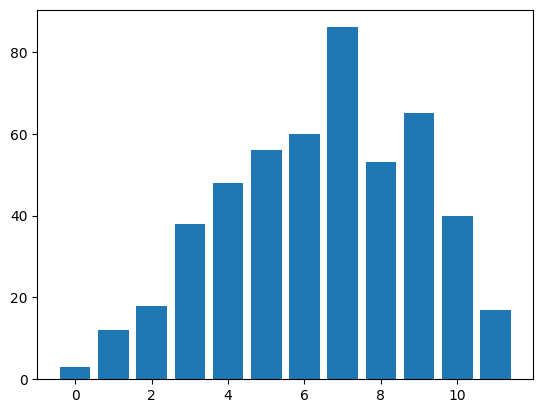

In [ ]:
p = 500
n = 12
simulate_data, people_per_trait = simulate_experiment(traits, n, p)

def visualize_asch_ocean(n,data):
    data = list(data)
    outcomes = range(n)
    counts = []

    for i in outcomes:
        matches = data.count(i)
        counts.append(matches)

    # plotting structure
    plt.bar(outcomes,counts)
    print(people_per_trait)


visualize_asch_ocean(n, simulate_data)

# observations: there are instances where people get every trial right
# and also instances where people get every trial wrong

# ?? implement ability to view how each error outcome is distributed in OCEAN traits?

# Question 4 - Model construction and validation

(5 points for 4a., 4b., and 4c. together)

## 4a.

Construct a Bayesian model with PyMC that represents the model described in questions #1, 2. It should have gentle regularizing priors and/or an order constraint to help the model converge.

## Designing Beta Priors for OCEAN Error Rates

We designed the priors that represented the error rates for each of the OCEAN traits under the beta model in order to prescribe a distinct error rate prominent in each of the 5 mixture components; the scale of the beta numbers and ratio allow variance through the graph to allow for differences in individuality within OCEAN groups.

The distributions of the graph are further tailored to each of the OCEAN personalities and their proclivities toward high and low error rates.

For instance, while a person associated with Openness will always display a form of conformity (error rates are never 0), the odds of an error rate increasing to the far left of the graph is low.

On the other hand, neurotic individuals possess a peak at the highest amount of errors; thus, due to their proclivity for high error-rates and conformity, the distribution is negatively skewed (the mean value for the error-rate is lower than the median value of errors expected).

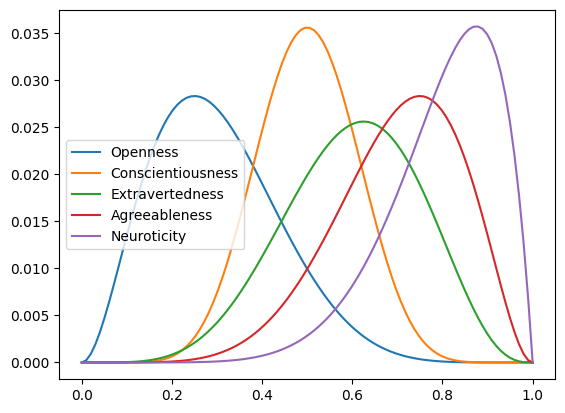

In [ ]:
# Designing priors for the error rate of each OCEAN trait
# o_p, c_p, e_p, a_p, n_p = 0.3, 0.5, 0.6, 0.7, 0.8

# used to simulate the OCEAN error_weight params given in the first model
beta_params = [[3, 7],[10, 10],[6, 4],[7, 3],[8, 2]]

trait_labels = ["Openness", "Conscientiousness", "Extravertedness",
                "Agreeableness", "Neuroticity"]

for i in range(len(beta_params)):

    b = beta_params[i]

    grid = np.linspace(0,1,100)

    prior = stats.beta(b[0],b[1]).pdf(grid)
    prior = prior / sum(prior)

    plt.plot(grid,prior,label=str(trait_labels[i]))
    plt.legend()

## Generating OCEAN Model

## Regularization

We regularized our OCEAN model by adjusting the initial Dirichlet prior distribution weights by multiplying by 10 upon first simulating the data with the initial Dirichlet params, which produced divergences.

The reason for this regularization was due to the fact that Dirichlet array with high variance for distribution caused the data to diverge across all 5 categories.

Addtionally, our OCEAN model was regularized through the implementation of an order constraint that enhanced the convergence of the model by placing a reward on p2 having a lesser error rate than p3; this was to discourage the divergence from respective error_rates due to the close proximity of 'extravertedness' and 'agreeableness' considering error weights.

In [ ]:
# OCEAN Asch Model

p = 200
n = 12
data, people_per_trait = simulate_experiment(traits, n, p)

with pm.Model() as ocean_model:

    # REGULARIZED priors for mixture weights

    # The prior values for weights of OCEAN traits were multiplied
    # by a scale of 10 to reduce variability and promote convergence
    # (explanation below)

    # initial Dirichlet params (prior distribution weights) before regularization
    o_param, c_param, e_param, a_param, n_param = 2.5, 1.5, 2.0, 3.5, .5
    scale = 10

    # prior distribution weights after regularization
    w = pm.Dirichlet('w',[o_param*scale, c_param*scale, e_param*scale, a_param*scale, n_param*scale])

    # prior for error_rates per each mixture component

    p0 = pm.Beta('p0',alpha=3,beta=7) # openness component
    p1 = pm.Beta('p1',alpha=10,beta=10) # conscientiousness component
    p2 = pm.Beta('p2',alpha=6,beta=4) # extravertedness component
    p3 = pm.Beta('p3',alpha=7,beta=3) # agreeableness component
    p4 = pm.Beta('p4',alpha=8,beta=2) # neuroticism component

    # order constraint to prevent model from diverging due to similarity in p2 and p3

    pm.Potential('order',pm.math.log(pm.math.switch(pm.math.lt(p2,p3), 1, 0.05)))

    components = [pm.Binomial.dist(n=12,p=p0),
                  pm.Binomial.dist(n=12,p=p1),
                  pm.Binomial.dist(n=12,p=p2),
                  pm.Binomial.dist(n=12,p=p3),
                  pm.Binomial.dist(n=12,p=p4),]


    # likelihood

    y = pm.Mixture('error',w=w,comp_dists=components,observed=data)

In [ ]:
# running the mixture_model with Markov Chain

# sampling chains

with ocean_model:
  trace_1 = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# summary values

az.summary(trace_1)

# r_hat values are all equal or approximate to 1.00

# mean values for weight and error priors match above data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.251,0.042,0.168,0.324,0.001,0.001,1750.0,1317.0,1.00
w[1],0.152,0.037,0.086,0.221,0.001,0.001,1449.0,1302.0,1.00
w[2],0.201,0.041,0.130,0.282,0.001,0.001,1825.0,1199.0,1.00
w[3],0.346,0.046,0.256,0.424,0.001,0.001,1872.0,1455.0,1.00
w[4],0.049,0.022,0.015,0.091,0.000,0.000,2313.0,1201.0,1.00
p0,0.344,0.062,0.258,0.486,0.003,0.002,786.0,699.0,1.00
p1,0.480,0.101,0.290,0.663,0.003,0.002,1128.0,1261.0,1.00
p2,0.519,0.103,0.307,0.695,0.004,0.003,773.0,733.0,1.01
p3,0.722,0.040,0.657,0.791,0.002,0.001,887.0,554.0,1.00
p4,0.758,0.111,0.548,0.943,0.003,0.002,1609.0,1194.0,1.00


## 4b. OCEAN Model and MCMC (with 500 participants)

Once you've constructed the model, demonstrate that it can recover the parameters that you specified in the simulation from question #3. The demonstration should satisfy three conditions:

- The Monte Carlo Markov Chains should converge.
- The Monte Carlo Markov Chains should be free of divergences.
- The posterior means should be roughly centered around the true values.

In [ ]:
# uses 500 participant test

# RUN QUESTION 3 simulation for dataset(simulate_data is same as result of question 3 parameters)

# same structure, but uses simulate_data from third question
# (run simulation in hypothesis 3 first)

with pm.Model() as ocean_model:

    # REGULARIZED priors for mixture weights

    # The prior values for weights of OCEAN traits were multiplied
    # by a factor of 100 to reduce variability and promote convergence

    # initial weights
    o_param, c_param, e_param, a_param, n_param = 2.5, 1.5, 2.0, 3.5, .5
    scale = 10


    # prior rates after regularization
    w = pm.Dirichlet('w',[o_param*scale, c_param*scale, e_param*scale, a_param*scale, n_param*scale])
    # prior for mixture error_rates

    p0 = pm.Beta('p0',alpha=3,beta=7) # openness component
    p1 = pm.Beta('p1',alpha=10,beta=10) # conscientiousness component
    p2 = pm.Beta('p2',alpha=6,beta=4) # extravertedness component
    p3 = pm.Beta('p3',alpha=7,beta=3) # agreeableness component
    p4 = pm.Beta('p4',alpha=8,beta=2) # neuroticism component

    components = [pm.Binomial.dist(n=12,p=p0),
                  pm.Binomial.dist(n=12,p=p1),
                  pm.Binomial.dist(n=12,p=p2),
                  pm.Binomial.dist(n=12,p=p3),
                  pm.Binomial.dist(n=12,p=p4),]


    y = pm.Mixture('error',w=w,comp_dists=components,observed=simulate_data)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


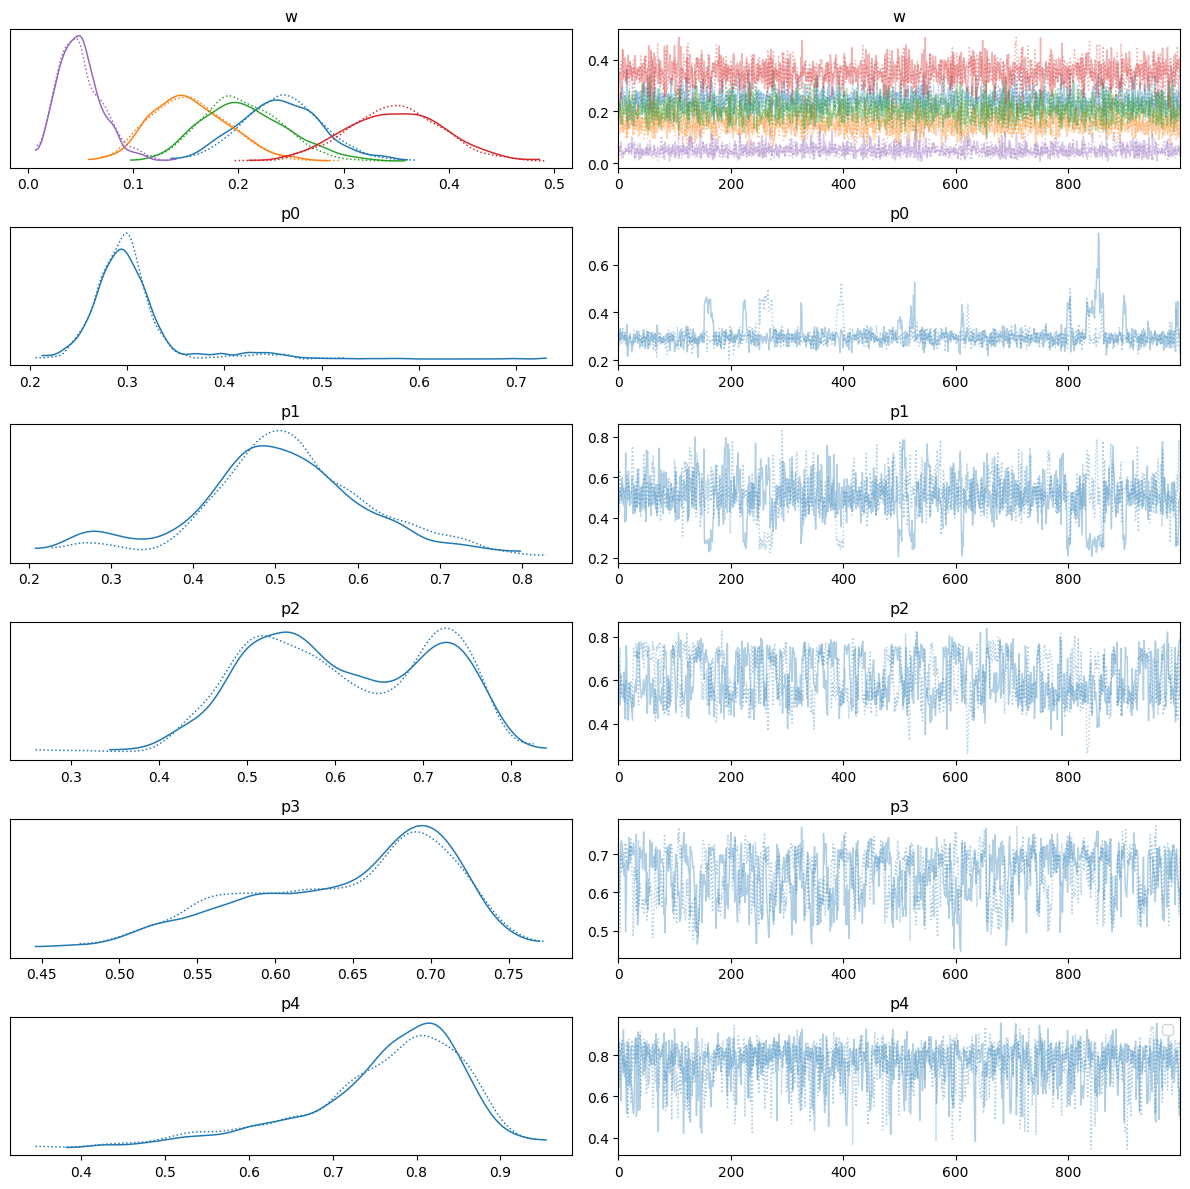

In [ ]:
with ocean_model:

    trace_2 = pm.sample()
    az.plot_trace(trace_2)
    plt.tight_layout();
    plt.legend()

In [ ]:
az.summary(trace_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.241,0.038,0.167,0.310,0.001,0.001,1667.0,1207.0,1.00
w[1],0.155,0.037,0.090,0.224,0.001,0.001,1567.0,1139.0,1.00
w[2],0.205,0.040,0.139,0.285,0.001,0.001,2133.0,1430.0,1.00
w[3],0.349,0.046,0.256,0.428,0.001,0.001,2164.0,1153.0,1.00
w[4],0.050,0.021,0.014,0.089,0.000,0.000,1910.0,1259.0,1.00
p0,0.303,0.045,0.233,0.398,0.003,0.002,404.0,169.0,1.01
p1,0.508,0.105,0.251,0.690,0.006,0.004,375.0,175.0,1.01
p2,0.609,0.106,0.446,0.783,0.006,0.004,392.0,1106.0,1.00
p3,0.645,0.066,0.514,0.739,0.004,0.003,383.0,1011.0,1.00
p4,0.757,0.103,0.528,0.904,0.003,0.002,1395.0,1323.0,1.00


## 4c. OCEAN Model with 50 Participants

Finally, let's validate that the estimation strategy can also work on small data. Simulate a new dataset which has only 50 people (the same sample size as the Asch study). Show that the model can roughly recover the simulated parameters.

You may have to move back and forth between 4a, 4b, 4c to satisfy all criteria simulatenously with one model.

In [ ]:
# simulated using defined function

# 50 participant test (new_data from simulate_experiment)

p = 50
n = 12
new_data, people_per_trait = simulate_experiment(traits, n, p)

with pm.Model() as ocean_model:

    # REGULARIZED priors for mixture weights

    # The prior values for weights of OCEAN traits were multiplied
    # by a factor of 100 to reduce variability and promote convergence

    # initial weights
    o_param, c_param, e_param, a_param, n_param = 2.5, 1.5, 2.0, 3.5, .5
    scale = 10


    # prior rates after regularization
    w = pm.Dirichlet('w',[o_param*scale, c_param*scale, e_param*scale, a_param*scale, n_param*scale])
    # prior for mixture error_rates

    p0 = pm.Beta('p0',alpha=3,beta=7) # openness component
    p1 = pm.Beta('p1',alpha=10,beta=10) # conscientiousness component
    p2 = pm.Beta('p2',alpha=6,beta=4) # extravertedness component
    p3 = pm.Beta('p3',alpha=7,beta=3) # agreeableness component
    p4 = pm.Beta('p4',alpha=8,beta=2) # neuroticism component

    components = [pm.Binomial.dist(n=12,p=p0),
                  pm.Binomial.dist(n=12,p=p1),
                  pm.Binomial.dist(n=12,p=p2),
                  pm.Binomial.dist(n=12,p=p3),
                  pm.Binomial.dist(n=12,p=p4),]

    pm.Potential('order',pm.math.log(pm.math.switch(pm.math.lt(p2,p3), 1, 0.05)))



    # likelihood (using simulated data from question 3)

    y = pm.Mixture('error',w=w,comp_dists=components,observed=new_data)


    trace_3 = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

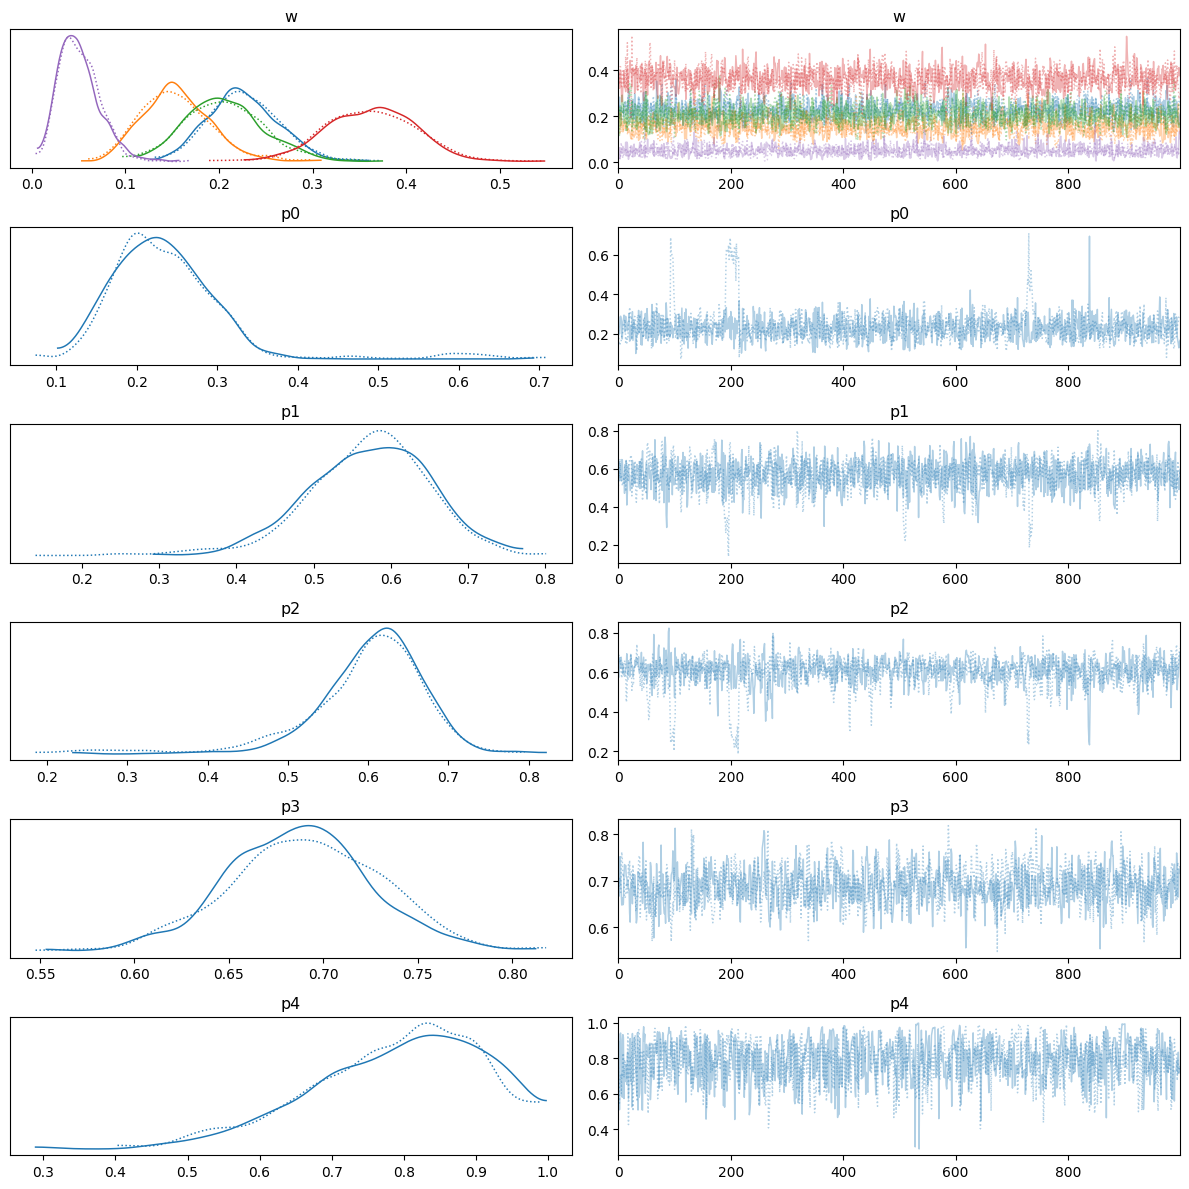

In [ ]:
# note: using numpyro for this simulation on to run chains faster

# divergence = 0 can be simulated by deleting nuts_sampler="numpyro"

az.plot_trace(trace_3)

plt.tight_layout();

In [ ]:
az.summary(trace_3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.227,0.037,0.163,0.301,0.001,0.001,1204.0,1253.0,1.0
w[1],0.155,0.037,0.088,0.223,0.001,0.001,1018.0,964.0,1.0
w[2],0.206,0.042,0.133,0.292,0.001,0.001,994.0,760.0,1.0
w[3],0.362,0.048,0.272,0.447,0.001,0.001,1176.0,1171.0,1.0
w[4],0.051,0.022,0.014,0.089,0.001,0.000,1108.0,1001.0,1.0
p0,0.236,0.073,0.131,0.334,0.005,0.004,578.0,270.0,1.0
p1,0.570,0.082,0.422,0.723,0.002,0.002,1295.0,782.0,1.0
p2,0.600,0.075,0.471,0.725,0.004,0.003,745.0,336.0,1.0
p3,0.689,0.039,0.608,0.756,0.001,0.001,1038.0,1140.0,1.0
p4,0.791,0.116,0.588,0.994,0.004,0.003,867.0,711.0,1.0


# Question 5 - Back to Asch

4 points for 5a. and 5b. together.

## 5a.

We are now ready to fit our model onto the real dataset. Reload the Asch dataset below, estimate your model, and display the trace plots.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/daniel-saunders-phil/cogs-303/main/Asch_experiment_1_data"
asch_1_dataset = pd.read_csv(url)
asch_treatment = asch_1_dataset[asch_1_dataset.treatment == 1] # treatment group
asch_control = asch_1_dataset[asch_1_dataset.treatment == 0] # control group

mistakes_treatment = asch_treatment.mistakes.values

print(asch_treatment)
print(asch_control)

    treatment  mistakes
0           1         0
1           1         0
2           1         0
3           1         0
4           1         0
5           1         0
6           1         0
7           1         0
8           1         0
9           1         0
10          1         0
11          1         0
12          1         0
13          1         1
14          1         1
15          1         1
16          1         1
17          1         2
18          1         2
19          1         2
20          1         2
21          1         2
22          1         3
23          1         3
24          1         3
25          1         3
26          1         3
27          1         3
28          1         4
29          1         4
30          1         4
31          1         5
32          1         5
33          1         5
34          1         5
35          1         6
36          1         7
37          1         7
38          1         8
39          1         8
40          1   

In [ ]:
# taking mistakes_treatment from above data

mistakes_treatment = asch_treatment.mistakes.values


with pm.Model() as ocean_model:

    # REGULARIZED priors for mixture weights

    # The prior values for weights of OCEAN traits were multiplied
    # by a factor of 100 to reduce variability and promote convergence

    # initial weights
    o_param, c_param, e_param, a_param, n_param = 2.5, 1.5, 2.0, 3.5, .5
    scale = 10


    # prior rates after regularization
    w = pm.Dirichlet('w',[o_param*scale, c_param*scale, e_param*scale, a_param*scale, n_param*scale])

    # prior for mixture error_rates

    p0 = pm.Beta('p0',alpha=3,beta=7) # openness component
    p1 = pm.Beta('p1',alpha=10,beta=10) # conscientiousness component
    p2 = pm.Beta('p2',alpha=6,beta=4) # extravertedness component
    p3 = pm.Beta('p3',alpha=7,beta=3) # agreeableness component
    p4 = pm.Beta('p4',alpha=8,beta=2) # neuroticism component

    components = [pm.Binomial.dist(n=12,p=p0),
                  pm.Binomial.dist(n=12,p=p1),
                  pm.Binomial.dist(n=12,p=p2),
                  pm.Binomial.dist(n=12,p=p3),
                  pm.Binomial.dist(n=12,p=p4),]

    pm.Potential('order',pm.math.log(pm.math.switch(pm.math.lt(p2,p3), 1, 0.05)))


    y = pm.Mixture('error',w=w,comp_dists=components,observed=mistakes_treatment)


# note: using numpyro for this simulation on to run chains faster

# divergence = 0 can be simulated by deleting nuts_sampler="numpyro"

    trace_4 = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

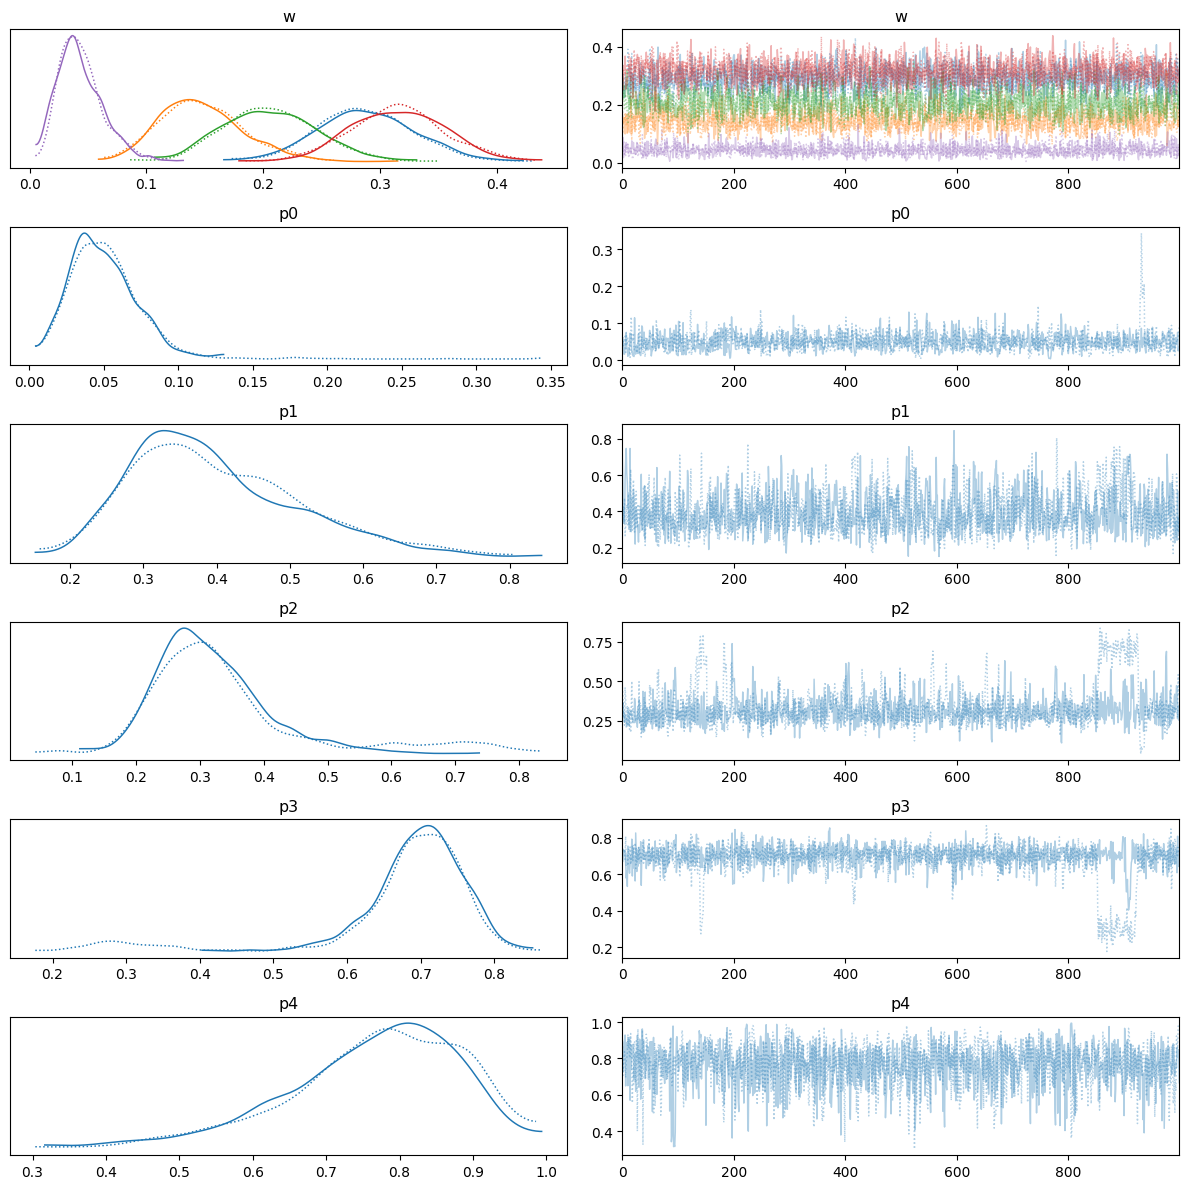

In [ ]:
az.plot_trace(trace_4)
plt.tight_layout();

In [ ]:
az.summary(trace_4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.288,0.041,0.213,0.364,0.001,0.001,1658.0,1287.0,1.00
w[1],0.147,0.035,0.084,0.215,0.001,0.001,1564.0,1551.0,1.00
w[2],0.206,0.040,0.136,0.280,0.001,0.001,1227.0,1373.0,1.00
w[3],0.315,0.040,0.236,0.386,0.001,0.001,1927.0,1720.0,1.00
w[4],0.044,0.019,0.013,0.081,0.000,0.000,1762.0,1125.0,1.00
p0,0.050,0.024,0.012,0.089,0.001,0.001,975.0,857.0,1.00
p1,0.399,0.114,0.214,0.618,0.005,0.004,785.0,750.0,1.00
p2,0.331,0.117,0.168,0.610,0.013,0.011,217.0,42.0,1.01
p3,0.685,0.095,0.548,0.818,0.014,0.010,142.0,42.0,1.02
p4,0.764,0.120,0.544,0.978,0.003,0.002,1567.0,1027.0,1.00


## 5b.

Let's evaluate the results. Is your model a good explanation of the Asch data?

- If you think it is, show it visually by comparing the predictions of your fitted model with the data.
- If not, what went wrong? Revisit your argument in #1. Which assumption was mistaken?

In [ ]:
with ocean_model:
    predictive_trace = pm.sample_posterior_predictive(trace_4)

<ipython-input-20-cc450eb8cd5c>:2: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  predictive_trace = pm.sample_posterior_predictive(trace_4)


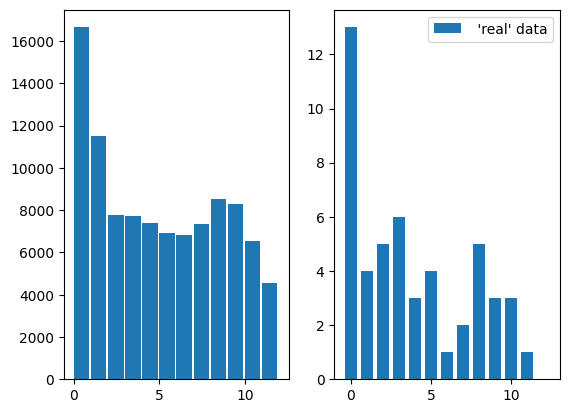

In [ ]:
f, ax = plt.subplots(1,2)

# the .flatten() merges all four groups and all 1000 draws into a single long list.
# So it fits into a histogram much more easily.

predict = predictive_trace.posterior_predictive.error.values.flatten()
ax[0].hist(predict,alpha=1,bins=12,width=0.9,color="tab:blue")

data_sample = list(mistakes_treatment)

# counting structure

outcomes = range(13)
counts = []

for i in outcomes:

    matches = data_sample.count(i)
    counts.append(matches)

# plotting structure

ax[1].bar(outcomes,counts,label=" 'real' data")
plt.legend()

Overall, the general structure of the data is captured, displaying a peak on the 0 value and minimum value past the value of 10 errors. The shape of the graph confirms the reasonable conclusion that there are individuals that exist as independents with relatively low or zero errors; in our model, this corresponds to individuals with Openness, which in this experiment corresponded to ap eak error rate at 0.04. This posterior peak is vastly different from the prior peak with an error rate of 0.3; this can be associated with the fact that the prevalence of independents in the data must be associated with a certain trait and Openness, possessing the lowest rate, classified a majority of independents. The median values of the graph show smaller variance, surmising the details of how most individuals who are Conscientious, Extraverted and Agreeable correspond to moderate levels of conformity. It can be assumed that the lowest number of participants that had more than 10 error outcomes were the minimum and extreme conformists; this population aligns with the prior error rate of Neurotic individuals, peaking at approximately 0.8. Differences in the graph, such as the other minimum value at 6 in the 'real data' having a higher relative value in the model can be associated with the fact that there are thre prior error rates of 0.5, 0.6 and 0.7 that describe similar levels of conformity and correspond to a large number of prior distributed individuals; therefore, the OCEAN graph's minimum is only located at the extreme right where neurotic individuals are placed.

# Question 6 - Revisions and Replications

This question changes depending on your answer to 5b. If you thought your model was a good explanation of the Asch data, answer 6a. If it wasn't, answer 6b. (4 points for answering either question. **You don't need to both 6a and 6b!**).


## 6a.

I have a new dataset for you. Asch conducted 2 follow up experiments in the mid-1950s. He was interested in how well his experiment generalizes to other groups of people. You'll analyze one of them. This is how he describes the new sample:

>"The second group (Group II) came from a large
metropolitan college. The population was more
heterogeneous but predominantly lower middle
class. A considerable proportion of the students
were second-generation immigrants who had
lived nearly always in an urban environment.
They represented a more diversified array of professional and intellectual interests than either of
the other groups"

Try fitting your model to this dataset. You don't need to modify the priors or order constraints to ensure convergence in this problem. We just want to see what happens when we fit the model as is to new data. Did anything go wrong?
- If not, yay! You are finished with unit 2.
- If something did, why does your model struggles to fit this new dataset?

In [ ]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/cogs-303/main/asch_experiment_2.csv"
asch_replication = pd.read_csv(url,index_col=0)
asch_2_mistakes = asch_replication.mistakes.values
asch_2_mistakes

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  3.,  4.,  5.,  5.,  6.,
        6.,  6.,  6.,  8.,  8.,  8.,  8.,  9.,  9., 10., 12., 12.])

In [ ]:
# new d distributed

*text*

## 6b.

Revise your model in light of what you learned in 5b. Fit your revised model to the original dataset. Does it fit better? Evaluate the new fit with a trace plot.

In [ ]:
# taking mistakes_treatment from above data

mistakes_treatment = asch_treatment.mistakes.values

with pm.Model() as ocean_model:

    # REGULARIZED priors for mixture weights

    # initial weights
    o_param, c_param, a_param, n_param = 2, 5, 3, .5

    # prior rates after regularization
    scale = 10

    # prior rates after regularization
    w = pm.Dirichlet('w',[o_param*scale, c_param*scale, a_param*scale, n_param*scale])

    # prior for mixture error_rates

    p0 = pm.Beta('p0',alpha=1,beta=10) # openness component
    p1 = pm.Beta('p1',alpha=2,beta=10) # conscientiousness component
    # p2 = pm.Beta('p2',alpha=3,beta=10) # extravertedness component
    p3 = pm.Beta('p3',alpha=7,beta=2) # agreeableness component
    p4 = pm.Beta('p4',alpha=8,beta=2) # neuroticism component

    components = [pm.Binomial.dist(n=12,p=p0),
                  pm.Binomial.dist(n=12,p=p1),
                  # pm.Binomial.dist(n=12,p=p2),
                  pm.Binomial.dist(n=12,p=p3),
                  pm.Binomial.dist(n=12,p=p4),]


    y = pm.Mixture('error',w=w,comp_dists=components,observed=mistakes_treatment)

    trace_5 = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

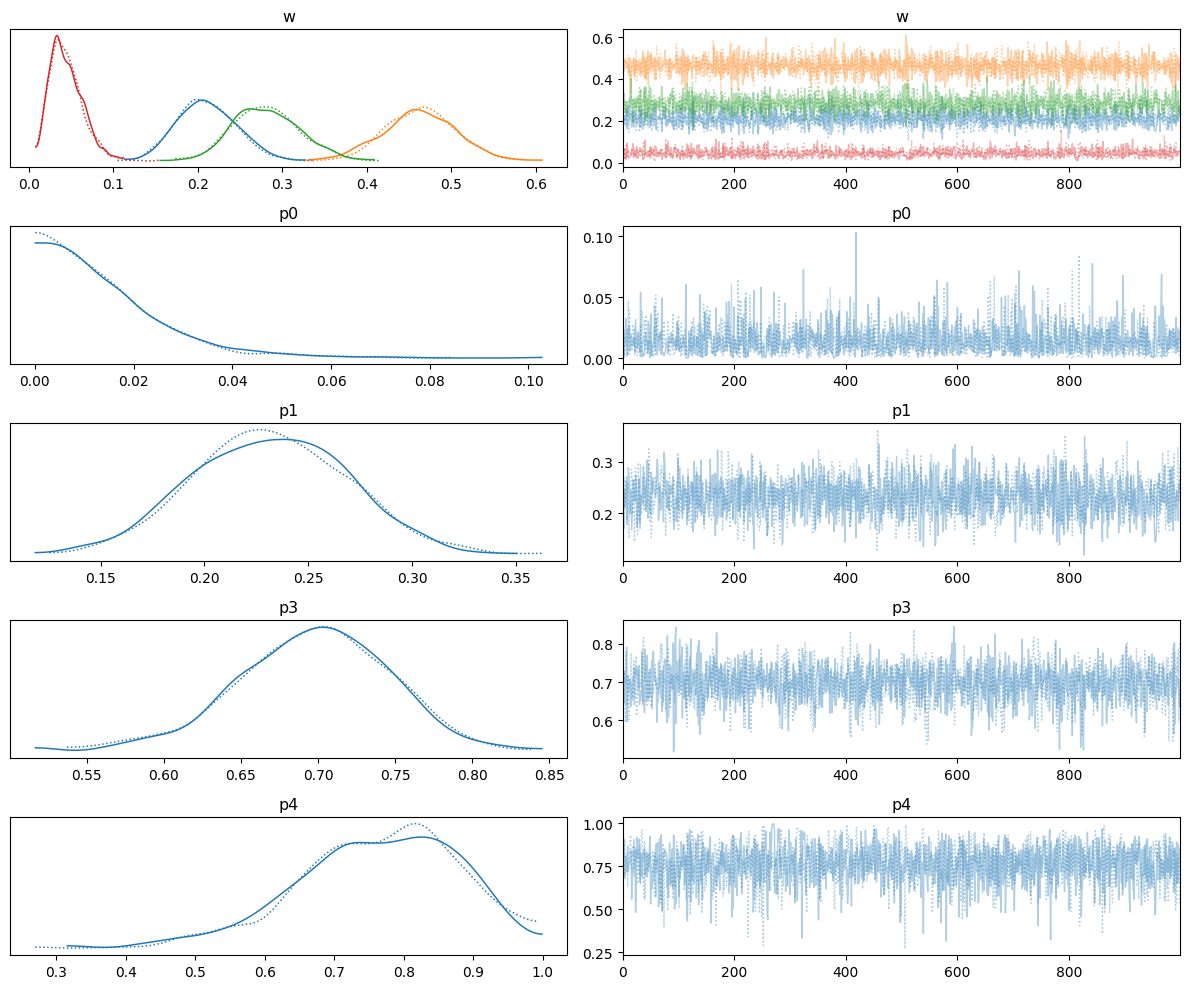

In [ ]:
az.plot_trace(trace_5)
plt.tight_layout();

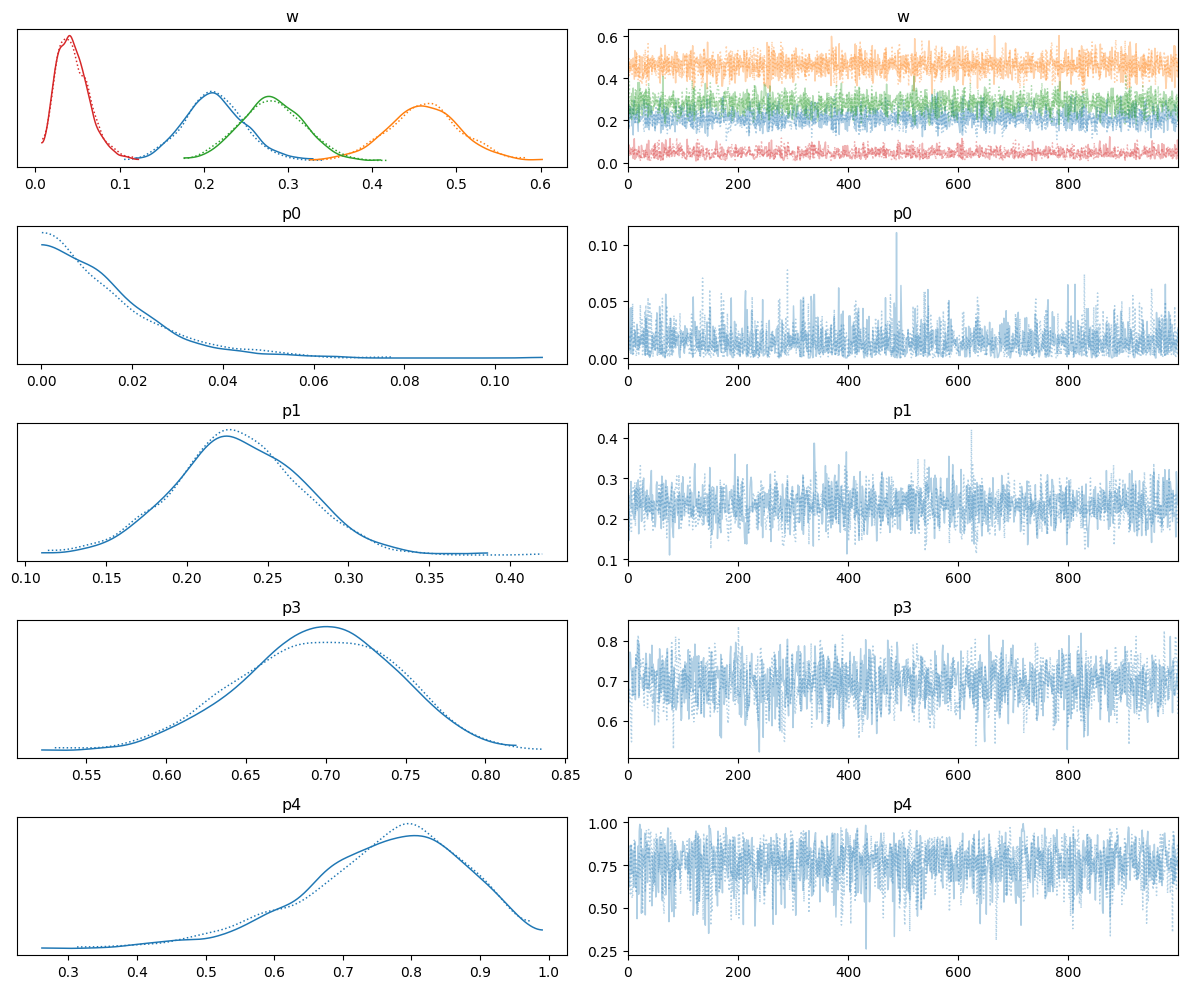

In [ ]:
with ocean_model:
    predictive_trace2 = pm.sample_posterior_predictive(trace_5)

with ocean_model:
    t3 = pm.sample(target_accept=0.95)

az.plot_trace(t3)
plt.tight_layout();

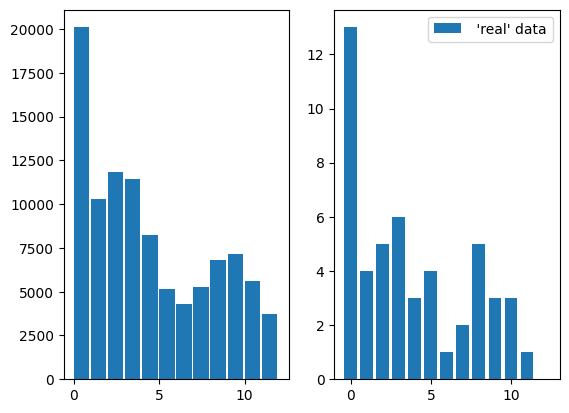

In [ ]:
f, ax = plt.subplots(1,2)

# the .flatten() merges all four groups and all 1000 draws into a single long list.
# So it fits into a histogram much more easily.

predict2 = predictive_trace2.posterior_predictive.error.values.flatten()
ax[0].hist(predict2,alpha=1,bins=12,width=0.9,color="tab:blue")

data_sample = list(mistakes_treatment)

# counting structure

outcomes = range(13)
counts = []

for i in outcomes:

    matches = data_sample.count(i)
    counts.append(matches)

# plotting structure
ax[1].bar(outcomes,counts,label=" 'real' data")
plt.legend()

In order to adjust the fit of the model, we reduced the mixture model to 4 components over 5, Openness, Conscientiousness, Agreeableness and Neuroticism. This effectively reduced the distribution of median values in the graph, as the participants with median error_rates were classified as either Conscientious or Agreeable without the middle option of Extraverted. Furthermore, we increased the weight of the Conscientious variable and decreased the Agreeable weight, in order to better fit the distribution of a highly populated distribution of people who committed less than 5 mistakes. The graph has different relative peaks from values 1-3 errors than the real data for 1-3 errors; however, in order to ameliorate this, we would have to target the specific priors for Conscientiousness and Openness to have higher precision --perhaps with a larger scale. However, for the purpose of our model, we were able to fit the data by prescribing to fewer mixed components, allowing more drastic distributions of data that did not gravitate toward the median.